In [1]:
%matplotlib inline

import lipid as lib
import numpy as np
from math import sqrt
from math import pi
import matplotlib.pyplot as plt
from jenkspy import jenks_breaks

In [2]:
#preprocessor
NDIM = 3
nlog = 46

In [3]:
#user input
trajFileName = "temp20"
Nconf = 100
topology = "20chol.top"
times = [10,19,28,37,46]
Nclusters = 2

In [4]:
#Initializing the parameters
Nblock = Nconf//nlog
Nchol = lib.cholConc(topology)
N,L,x,y = lib.processTraj(trajFileName,Nchol,NDIM,Nconf)

Nperlipid = 12
Nperchol = 8
Nlipids = (N - Nperchol * Nchol) // Nperlipid
Ncholbeads = Nchol * Nperchol
Nlipidbeads = Nlipids * Nperlipid

In [5]:
#Translating z-axis
x,y = lib.translateZ(x,y)

#COM MASSING
com_lipids = lib.comassing(x,"DPPC",L)
com_chol = lib.comassing(y,"CHOL",L)
del x,y

#Particle Class
p_lipids = [0 for i in range(Nlipids)]
p_chol = [0 for i in range(Nchol)]

for i in range(Nlipids):
    p_lipids[i] = lib.Particle_d(com_lipids[i])
for i in range(Nchol):
    p_chol[i] = lib.Particle_d(com_chol[i])

del com_lipids, com_chol 

In [6]:
#Only one layer
p_lipids = list(filter(lambda x : x.pos[2][0] > 0 , p_lipids)) 
p_chol = list(filter(lambda x : x.pos[2][0] > 0 , p_chol))
Nlipids = len(p_lipids)
Nchol = len(p_chol)
N = Nlipids + Nchol

In [7]:
for start in range(Nblock):
    frontblock = start*nlog
    for t in times:
        for i in range(Nlipids):
            p_lipids[i].calcS(frontblock+t,frontblock,L)
            #for i in range(Nchol):
                #p_chol[i].calcS(t,frontblock,L)

In [8]:
Nblock = 1

In [9]:
jenk_intervals = {}

In [10]:
for start in range(Nblock):
    frontblock = start*nlog
    for t in times:
        endblock = frontblock + t
        jenk_intervals[endblock] = jenks_breaks(list(map(lambda x : x.getS(endblock),p_lipids)),Nclusters)
        

In [11]:
print(jenk_intervals)
clusters = {}

{10: [0.0012434550878744782, 0.04675589163707301, 0.1269973329225633], 19: [0.004519545822803537, 0.1388596016690736, 0.45066201188501553], 28: [0.0033200154785446774, 0.22664975342689309, 0.7065696447252893], 37: [0.006627024900194391, 0.4165638130553662, 1.3231665483795672], 46: [0.033414040836147275, 0.9651173324250393, 2.6603894037365787]}


In [12]:
#define a function so that it's more compartmentalized and visual
def disp_cluster(p_lipids,p_chol,interval,frontblock,endblock):
    
    p_lipids = sorted(p_lipids, key = lambda x: x.getS(endblock))
    clusters = []
    i_start = 0
    for i in range(1,len(interval)-1):
        i_end = lib.index(list(map(lambda x : x.getS(endblock),p_lipids)),interval[i])
        cluster = p_lipids[i_start:i_end+1]
        i_start = i_end + 1
        clusters.append(cluster)
    clusters.append(p_lipids[i_start:])
    
    xchol,ychol = xyMap(p_chol,frontblock) 
    
    for cluster in clusters:
        xlst,ylst = xyMap(cluster,frontblock)
        plt.scatter(xlst,ylst)
    
    plt.scatter(xchol,ychol,c= "black")
    print("t="+str(endblock))
    print(interval)
    plt.show()
    
def xyMap(p_lipids,t):
    xlst = list(map(lambda x : x.pos[0][t] ,p_lipids))
    ylst = list(map(lambda x : x.pos[1][t] ,p_lipids))
    return xlst,ylst
    

t=10
[0.0012434550878744782, 0.04675589163707301, 0.1269973329225633]


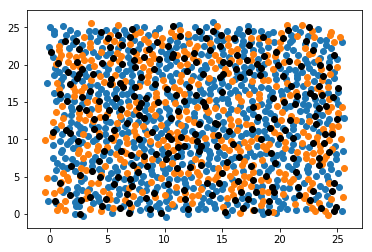

t=19
[0.004519545822803537, 0.1388596016690736, 0.45066201188501553]


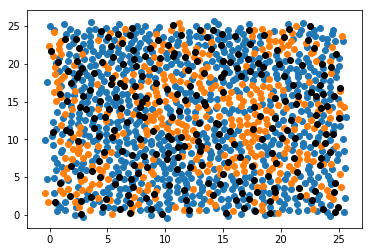

t=28
[0.0033200154785446774, 0.22664975342689309, 0.7065696447252893]


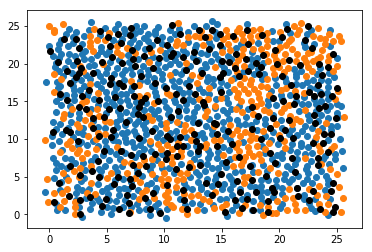

t=37
[0.006627024900194391, 0.4165638130553662, 1.3231665483795672]


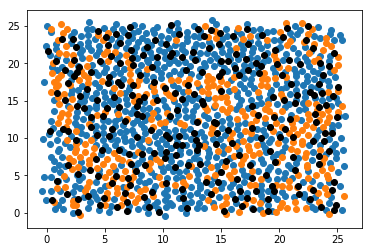

t=46
[0.033414040836147275, 0.9651173324250393, 2.6603894037365787]


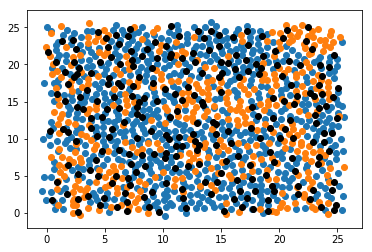

In [13]:
for start in range(Nblock):
    frontblock = start*nlog
    for t in times:
        endblock = frontblock + t
        interval = jenk_intervals[endblock]
        disp_cluster(p_lipids,p_chol,interval,frontblock,endblock)
        


In [14]:
#new input
Nclusters = 3

for start in range(Nblock):
    frontblock = start*nlog
    for t in times:
        endblock = frontblock + t
        jenk_intervals[endblock] = jenks_breaks(list(map(lambda x : x.getS(endblock),p_lipids)),Nclusters)

t=10
[0.0012434550878744782, 0.032467065812912005, 0.059420640353333755, 0.1269973329225633]


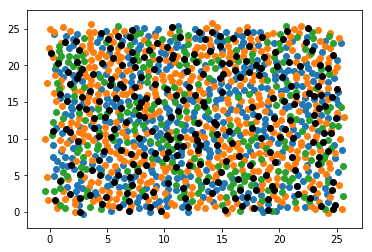

t=19
[0.004519545822803537, 0.09648129496320663, 0.181004867490743, 0.45066201188501553]


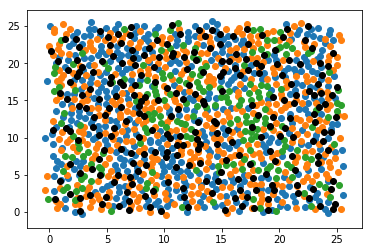

t=28
[0.0033200154785446774, 0.16340323289377395, 0.3107886465867484, 0.7065696447252893]


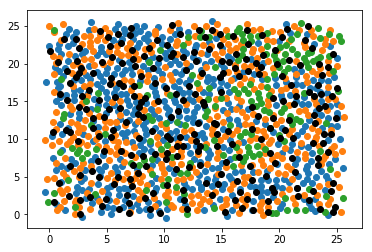

t=37
[0.006627024900194391, 0.29328755090953573, 0.5618498979166004, 1.3231665483795672]


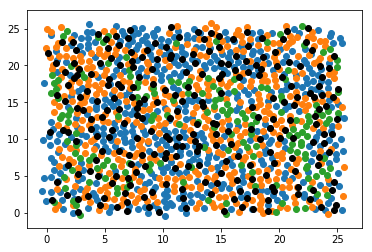

t=46
[0.033414040836147275, 0.6935408147586616, 1.2765085401083085, 2.6603894037365787]


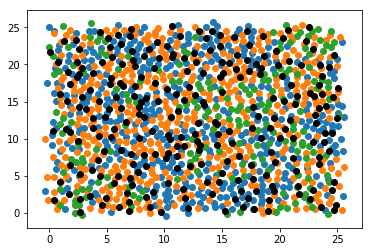

In [15]:
for start in range(Nblock):
    frontblock = start*nlog
    for t in times:
        endblock = frontblock + t
        interval = jenk_intervals[endblock]
        disp_cluster(p_lipids,p_chol,interval,frontblock,endblock)
        


In [16]:
#new input
Nclusters = 4

for start in range(Nblock):
    frontblock = start*nlog
    for t in times:
        endblock = frontblock + t
        jenk_intervals[endblock] = jenks_breaks(list(map(lambda x : x.getS(endblock),p_lipids)),Nclusters)


t=10
[0.0012434550878744782, 0.02751384752366753, 0.0488451936962284, 0.07318720509002978, 0.1269973329225633]


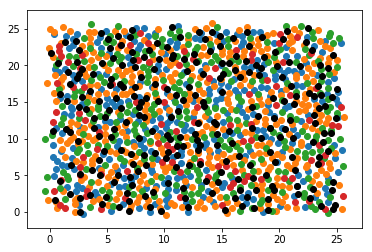

t=19
[0.004519545822803537, 0.08306508935851493, 0.151375336498387, 0.24031436446322282, 0.45066201188501553]


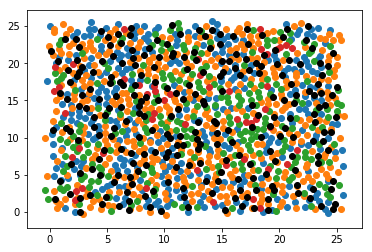

t=28
[0.0033200154785446774, 0.13464748914862087, 0.2477393767762443, 0.3967035456420863, 0.7065696447252893]


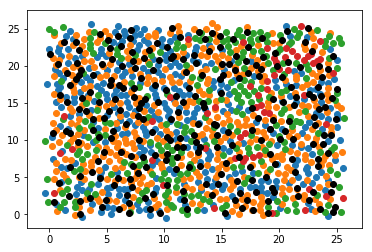

t=37
[0.006627024900194391, 0.24447895629162988, 0.4375287634176795, 0.6900824098940185, 1.3231665483795672]


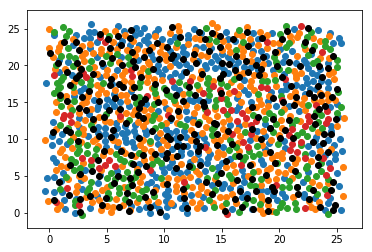

t=46
[0.033414040836147275, 0.5851560367928708, 0.9964133736992935, 1.5076610643872959, 2.6603894037365787]


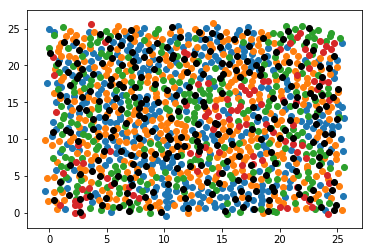

In [17]:
for start in range(Nblock):
    frontblock = start*nlog
    for t in times:
        endblock = frontblock + t
        interval = jenk_intervals[endblock]
        disp_cluster(p_lipids,p_chol,interval,frontblock,endblock)
        


In [18]:
#new input
Nclusters = 5

for start in range(Nblock):
    frontblock = start*nlog
    for t in times:
        endblock = frontblock + t
        jenk_intervals[endblock] = jenks_breaks(list(map(lambda x : x.getS(endblock),p_lipids)),Nclusters)


t=10
[0.0012434550878744782, 0.024642993609295737, 0.04200825398392572, 0.059420640353333755, 0.0809242910081616, 0.1269973329225633]


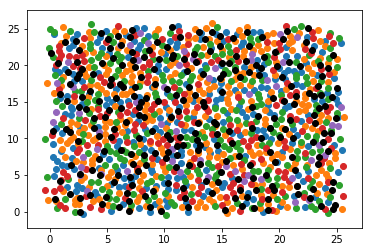

t=19
[0.004519545822803537, 0.07073469848274026, 0.12170011424090871, 0.17730682485140778, 0.2600415723236476, 0.45066201188501553]


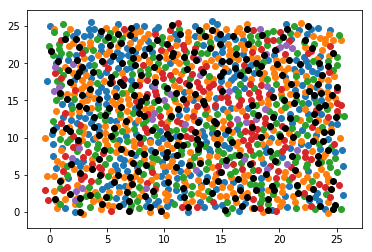

t=28
[0.0033200154785446774, 0.11218864208332503, 0.20100880710562738, 0.29950173875348435, 0.43989530718573233, 0.7065696447252893]


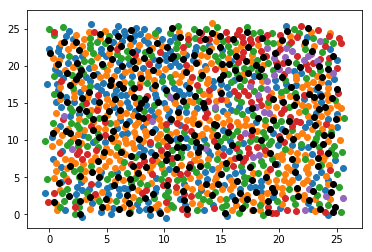

t=37
[0.006627024900194391, 0.22082005190564327, 0.3739881885324806, 0.5424582513285906, 0.7711472821027405, 1.3231665483795672]


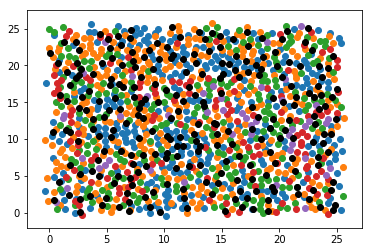

t=46
[0.033414040836147275, 0.47800552596322793, 0.8245446162798673, 1.1825816647863627, 1.6314151441522877, 2.6603894037365787]


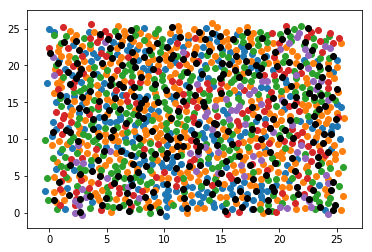

In [19]:
for start in range(Nblock):
    frontblock = start*nlog
    for t in times:
        endblock = frontblock + t
        interval = jenk_intervals[endblock]
        disp_cluster(p_lipids,p_chol,interval,frontblock,endblock)
        
